In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# sudocode
read in the file names to visualize

loop through the file names

plot each datset 



# read the file into a list
list_of_series_df = pd.read_csv('C:\SRC\AI\ProjectOne_Team2\\resources\\filename.csv')
display (list_of_series_df)

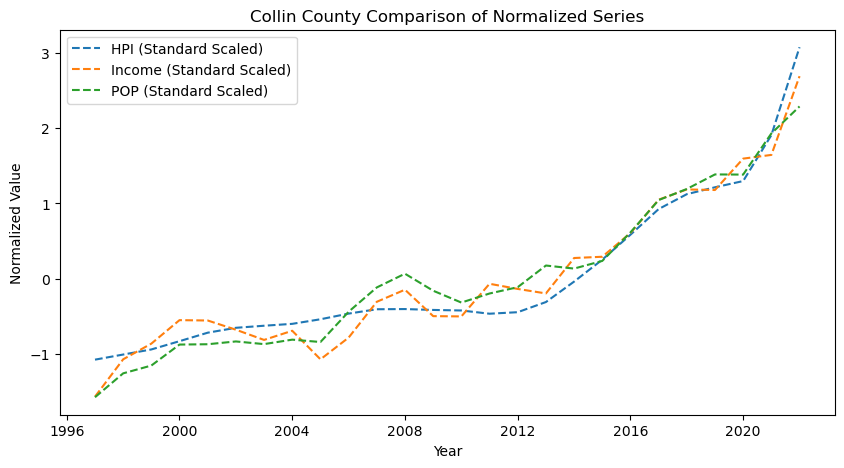

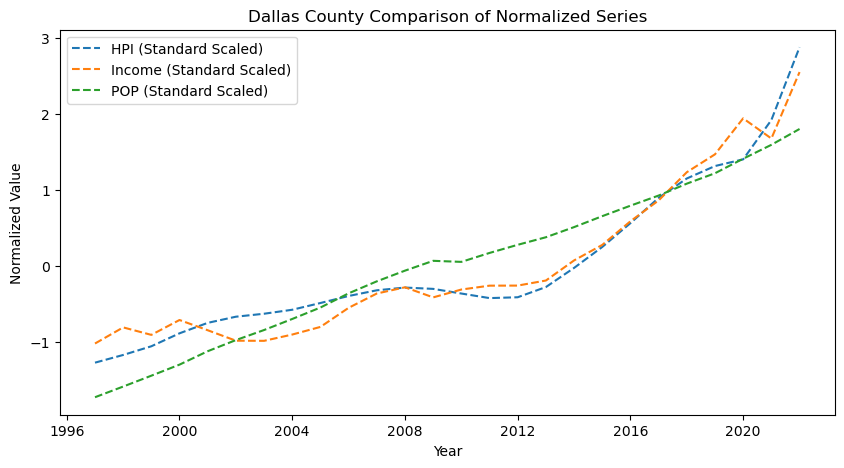

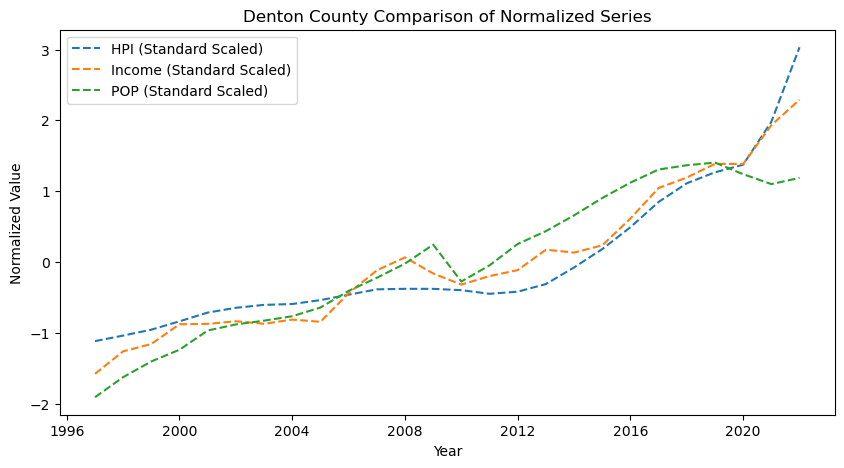

In [2]:
list_of_series_df = pd.read_csv('C:\SRC\AI\ProjectOne_Team2\\resources\\filename.csv')
# read the file into a list
for idx in range (0, 3):
    file_id=list_of_series_df.loc[idx,'filename']
    county=list_of_series_df.loc[idx,'county']
    desc=list_of_series_df.loc[idx,'series_Desc']
    series_grp=  pd.read_csv(f'C:\SRC\AI\ProjectOne_Team2\\resources\{file_id}.csv',
                                index_col='date',
                                parse_dates=True,
                                date_format='%Y-%m-%d')
    file_id=list_of_series_df.loc[idx+3,'filename']
    series_grp1=  pd.read_csv(f'C:\SRC\AI\ProjectOne_Team2\\resources\{file_id}.csv',
                                index_col='date',
                                parse_dates=True,
                                date_format='%Y-%m-%d')
    file_id=list_of_series_df.loc[idx+5,'filename']
    series_grp2=  pd.read_csv(f'C:\SRC\AI\ProjectOne_Team2\\resources\{file_id}.csv',
                                index_col='date',
                                parse_dates=True,
                                date_format='%Y-%m-%d')
    
    df_scaled=pd.concat([series_grp,series_grp1,series_grp2],axis=1)
    df_scaled.columns= ['HPI','Income','POP']
    ## new test
    scaler = StandardScaler()
    df_standard_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled.columns, index=df_scaled.index)
    '''
    display (df_standard_scaled)
    # display (series_group)
    df_standard_scaled.plot()  # This plots all columns with numerical data against the index
    plt.title(f'Data from {file_id}')  # Set the title of the plot to include the filename
    plt.xlabel('Year')  # Set the x-axis label
    plt.ylabel(desc)  # Set the y-axis label
    df_standard_scaled.plot(color=['blue', 'green', 'red'])
    plt.savefig(f'../reports/{county} standard scale.png')
    plt.show()
    '''

    # Plotting both normalized datasets
    plt.figure(figsize=(10, 5))
    # plt.plot(df_scaled['HPI'], label='HPI (Min-Max Scaled)')
    # plt.plot(df_scaled['Income'], label='Income (Min-Max Scaled)')
    # plt.plot(df_scaled['POP'], label='POP (Min-Max Scaled)')
    plt.plot(df_standard_scaled['HPI'], label='HPI (Standard Scaled)', linestyle='--')
    plt.plot(df_standard_scaled['Income'], label='Income (Standard Scaled)', linestyle='--')
    plt.plot(df_standard_scaled['POP'], label='POP (Standard Scaled)', linestyle='--')
    plt.title(f'{county} County Comparison of Normalized Series')
    plt.xlabel('Year')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.savefig(f'../reports/{county}_Normalized_Series.png')
    plt.show()